In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [445]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

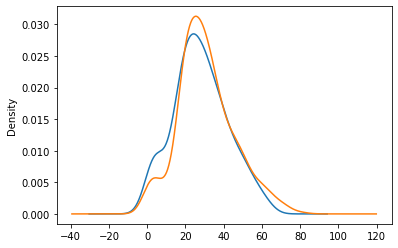

In [425]:
data_df.groupby('Sex').Age.plot(kind='kde')

## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [446]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [447]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [448]:
del data_df['Survived']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [726]:
x_data = data_df.copy()
x_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [449]:
data_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [450]:
data_df.shape

(891, 11)

In [451]:
data_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [452]:
data_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [453]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [454]:
x_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [455]:
# # 기본적인 결측치 채우는 방법
mean_age = x_data['Age'].median(skipna=True)
x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

In [456]:
x_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [457]:
x_data['Embarked'] = x_data['Embarked'].fillna("S")

In [458]:
x_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [459]:
sex=x_data["Sex"].apply(lambda x: 1 if x=='male' else 0)
x_data['Sex']=sex

In [460]:
x_data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [461]:
x_data['age_group']=pd.cut(x=x_data['Age'], bins=[0,20,30,40,50,80], labels=[0,1,2,3,4])

In [462]:
x_data['age_group'].isna().sum()

0

In [463]:
emb=x_data['Embarked'].apply(lambda x: 0 if x=='S' else (1 if x=='C'else 2 ))
x_data['Embarked']=emb

In [465]:
x_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [388]:
X=x_data[['Pclass','Sex','age_group','Embarked','Parch','SibSp']]
y= data_df[['Survived']]

In [389]:
(X.shape, y.shape)

((891, 6), (891, 1))

In [390]:
X.head(2)

,Pclass,Sex,age_group,Embarked,Parch,SibSp
0,3,1,1,0,0,1
1,1,0,2,1,0,1


In [391]:
y.head(2)

,Survived
0,0
1,1


# Pie chart for categorical variable 

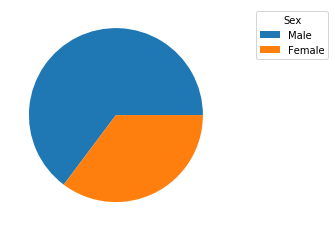

In [712]:
from matplotlib import pyplot as plt
data=x_data['Sex'].value_counts()
categories = ['Male','Female']
plt.pie(data)
plt.legend(categories, loc='upper right', bbox_to_anchor=(1.5,1), title = 'Sex')
plt.show()

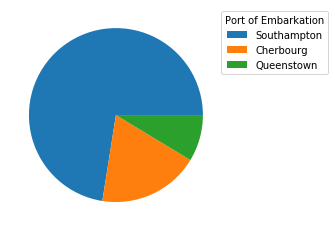

In [711]:
from matplotlib import pyplot as plt
data=x_data['Embarked'].value_counts()
categories = ['Southampton','Cherbourg','Queenstown']
plt.pie(data)
plt.legend(categories, loc='upper right', bbox_to_anchor=(1.5,1), title='Port of Embarkation')
plt.show()



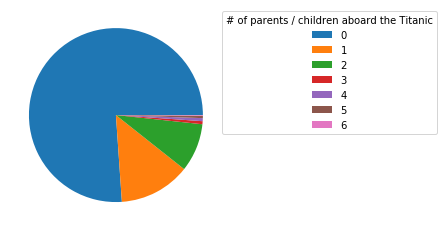

In [710]:
from matplotlib import pyplot as plt
data=x_data['Parch'].value_counts()
categories = ['0','1','2','3','4','5','6']
plt.pie(data)
plt.legend(categories, loc='upper right', bbox_to_anchor=(2.0,1), title='# of parents / children aboard the Titanic')
plt.show()

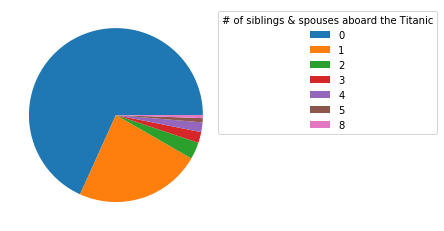

In [721]:
from matplotlib import pyplot as plt
data=x_data['SibSp'].value_counts()
categories = ['0','1','2','3','4','5','8']
plt.pie(data)
plt.legend(categories, loc='upper right', bbox_to_anchor=(2.0,1), title='# of siblings & spouses aboard the Titanic')
plt.show()

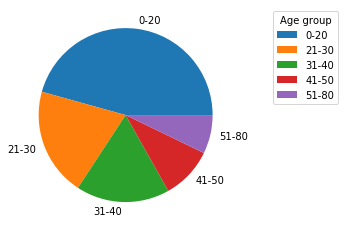

In [718]:
data=x_data['age_group'].value_counts()
categories = ['0-20','21-30','31-40','41-50','51-80']
plt.pie(data, labels=categories)
plt.legend(title='Age group', bbox_to_anchor=(1.5, 1))
plt.show()


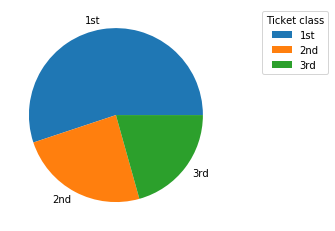

In [724]:
data=x_data['Pclass'].value_counts()
categories = ['1st','2nd','3rd']
plt.pie(data, labels=categories)
plt.legend(title='Ticket class', bbox_to_anchor=(1.5, 1))
plt.show()

# One hot encoder for categorical vaiables

In [496]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categories='auto')
print(ohe)

#fit
ohe_cat_vars=ohe.fit_transform(X).toarray()
print(ohe_cat_vars.shape)
ohe_cat_vars[:]

OneHotEncoder(categorical_features=None, categories='auto', drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)
(891, 27)


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [497]:
feature_names= ohe.get_feature_names()
feature_names

array(['x0_1', 'x0_2', 'x0_3', 'x1_0', 'x1_1', 'x2_0', 'x2_1', 'x2_2',
       'x2_3', 'x2_4', 'x3_0', 'x3_1', 'x3_2', 'x4_0', 'x4_1', 'x4_2',
       'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x5_0', 'x5_1', 'x5_2', 'x5_3',
       'x5_4', 'x5_5', 'x5_8'], dtype=object)

In [725]:
headers=list(X.columns.values)

for each in headers:
    print(f"{each}\t unique values: {sorted(set(X[each]))}")

Pclass	 unique values: [1, 2, 3]
Sex	 unique values: [0, 1]
age_group	 unique values: [0, 1, 2, 3, 4]
Embarked	 unique values: [0, 1, 2]
Parch	 unique values: [0, 1, 2, 3, 4, 5, 6]
SibSp	 unique values: [0, 1, 2, 3, 4, 5, 8]


In [519]:
new_feature_names = []
for each in feature_names:
    nm, lvl = each.split("_")
    idx = int(nm[1:])
    cat_name = headers[idx]
    new_feature_name="{}_{}".format(cat_name, lvl)
    new_feature_names.append(new_feature_name)
    
print(new_feature_names)

['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'age_group_0', 'age_group_1', 'age_group_2', 'age_group_3', 'age_group_4', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8']


In [538]:
#get labels
label=y_data['Survived'].values.astype('int')
label[:3]
label.shape

(891,)

In [523]:
label=['Survived']
for each in label:
    print(f"{each}\t unique values: {sorted(set(y[each]))}")

Survived	 unique values: [0, 1]


In [681]:
len(new_feature_names)

27

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)
* five fold cross validation for parameter optimization on trainse

In [567]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(ohe_cat_vars, label, test_size=0.3, random_state=0, shuffle=True, stratify=y)

In [568]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 27) (268, 27) (623,) (268,)


In [569]:
X_train[:2], X_test[:2]

(array([[0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]))

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)
* Five -fold cross validation for parameter optimization 

In [570]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

def five_fold_CV(clf, params, x, y):
    cv_model=RandomizedSearchCV(clf, params, scoring='roc_auc', n_jobs=-1,
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
                               verbose=1, iid=True, n_iter=30, refit=True)
    cv_model.fit(x,y)
    
    return cv_model.best_estimator_, cv_model.best_score_



## 4. Train the model


In [761]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2017)

parameters = {'max_iter': [30, 80, 120, 250, 500, 720, 830, 1000], 
                    'tol': [0.001, 0.01, 0.1],
                    'C': [0.01, 0.1, 1.0, 5.0, 10.0, 25.0, 50.0, 100.0],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                    'class_weight': [None,'balanced'],
                    'penalty':['l2']
        }

best_lr_model, best_cv_performance = five_fold_CV(lr, parameters, X_train, y_train)
best_lr_model, best_cv_performance

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    8.9s finished


(LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=720, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=2017, solver='liblinear', tol=0.01, verbose=0,
                    warm_start=False), 0.841916699768039)

In [747]:
#SVM
from sklearn.svm import SVC
svm=SVC(random_state=0)

parameters = {"C": [0.001, 0.01, 0.1, 1.0 , 2,8, 32, 64, 128, 512, 1024, 2048],
             'gamma':['scale','auto', 0.01, 0.01, 1.0, 1.3],
             'probability':[True],
             'tol':[0.1,0.01,0.001,0.0001]}
#cv
best_svm_model, best_cv_performance=five_fold_CV(svm, parameters, X_train, y_train)
best_svm_model, best_cv_performance

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   24.2s finished


(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
     max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.01,
     verbose=False), 0.8467580356655071)

In [571]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# define search space
tuned_parameters = {'n_estimators':[50, 100, 250,  500, 750, 1000, 1250, 1500, 2000], 
                    'criterion':['gini', 'entropy'], 
                    'max_features':['log2', 'auto', None], 
                    'min_samples_split':[2, 3, 4], 
                    'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 32, None], 
                    'min_samples_leaf':[1, 2], 
                    'max_leaf_nodes': [None, 5, 10],
                    'min_impurity_decrease':[0.1, 0.01, 0.001, 0.0001, 0.00001],
                    'bootstrap': [True, False],
                    'class_weight': [None, 'balanced', 'balanced_subsample']}

#cv

best_rf_model, best_cv_performance = five_fold_CV(rf, tuned_parameters,X_train, y_train)
best_rf_model, best_cv_performance

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


(RandomForestClassifier(bootstrap=True, class_weight='balanced',
                        criterion='entropy', max_depth=6, max_features='log2',
                        max_leaf_nodes=None, min_impurity_decrease=0.0001,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=4, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=0, verbose=0, warm_start=False),
 0.8501849711828587)

In [555]:
#XGboost classifier

from xgboost import XGBClassifier

xg = XGBClassifier(random_state=0)

parameters = {'max_depth':[3,4,5],
             'gamma':[0.5, 1, 1.5,2.0],
             'colsample_bytree':[0.6,0.8, 1.0]
             'boost':['gbtree','gblinear','dart']}
#cv

best_xgb_model, best_cv_performance = five_fold_CV(xg, parameters,X_train, y_train)
best_xgb_model, best_cv_performance

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.2s finished


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=1,
               objective='binary:logistic', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 0.849818377520125)

In [767]:
#XGboost classifier

from xgboost import XGBClassifier

xg = XGBClassifier(random_state=0)

parameters = {'max_depth':[3,4,5],
             'gamma':[0.5, 1, 1.5,2.0],
             'colsample_bytree':[0.6,0.8, 1.0],
             'boost':['gbtree','gblinear','dart'],
             'learning_rate':[0.05, 0.08, 0.1]}
#cv

best_xgb_model, best_cv_performance = five_fold_CV(xg, parameters,X_train, y_train)
best_xgb_model, best_cv_performance

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.6s


[15:53:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boost } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.9s finished


(XGBClassifier(base_score=0.5, boost='gblinear', booster='gbtree',
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
               gamma=1, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=5, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=0,
               num_parallel_tree=1, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 0.8484735771232292)

In [737]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


parameters = {'n_neighbors':[5, 8, 10,11, 13,20, 25],
              'weights':['uniform']
    
}
#cv

best_knn_model, best_cv_performance = five_fold_CV(knn, parameters,X_train, y_train)
best_knn_model, best_cv_performance

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished


(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                      weights='uniform'), 0.8416247371430834)

In [297]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [633]:
#save model using pickle
import pickle as pkl

def save_pkl(data, file_name):
    with open(file_name, 'wb') as fr:
        pkl.dump(data, fr)
        
def load_pkl(file_name):
    with open(file_name, 'rb') as fr:
        data=pkl.load(fr)
    return data

In [762]:
save_pkl(best_lr_model,'lr_model.pkl')
save_pkl(best_svm_model, "svm_model.pkl")
save_pkl(best_rf_model, "rf_model.pkl")
save_pkl(best_xgb_model, 'xgb_model.pkl')
save_pkl(best_knn_model, "knn_model.pkl")

In [763]:
best_lr_model = load_pkl("lr_model.pkl")
best_svm_model = load_pkl("svm_model.pkl")
best_rf_model = load_pkl("rf_model.pkl")
best_xgb_model = load_pkl('xgb_model.pkl')
best_knn_model = load_pkl('knn_model.pkl')

# AUC_ROC score

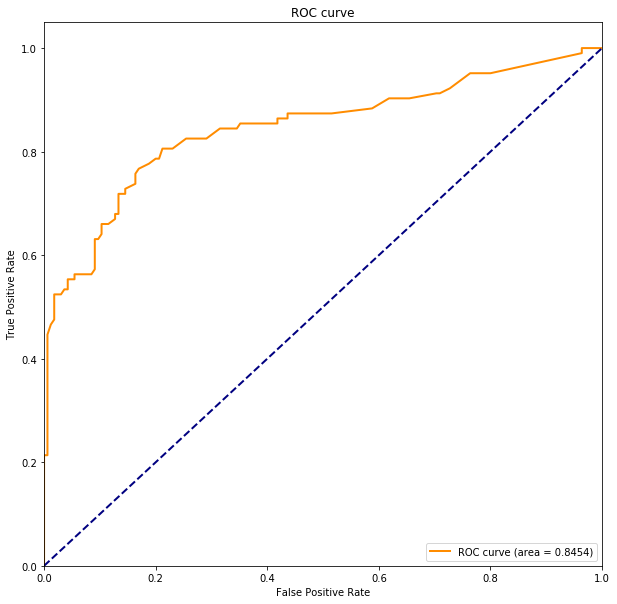

In [768]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=best_lr_model.predict_proba(X_test)[:,1]) 

roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

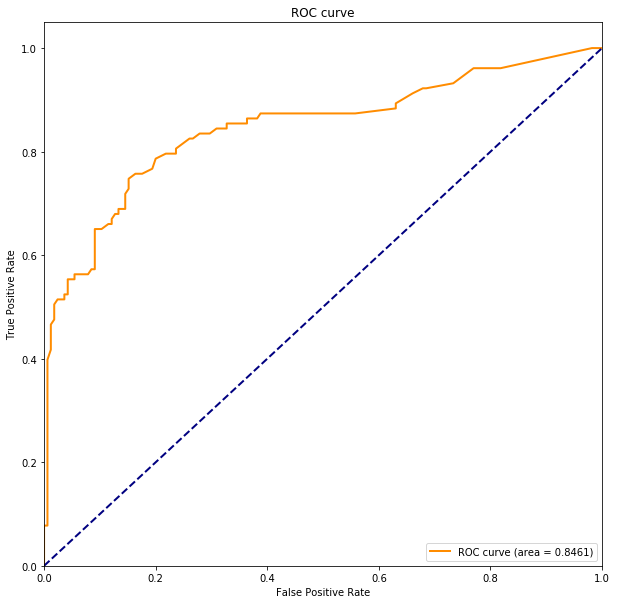

In [638]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=best_svm_model.predict_proba(X_test)[:,1]) 
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

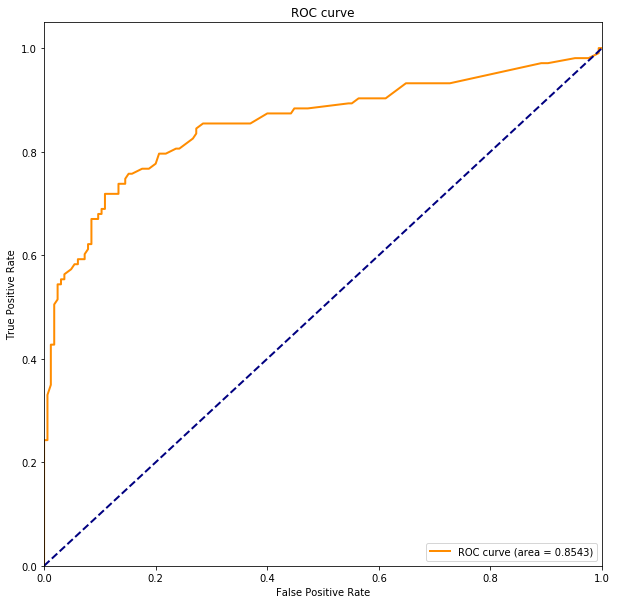

In [639]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=best_rf_model.predict_proba(X_test)[:,1]) 
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

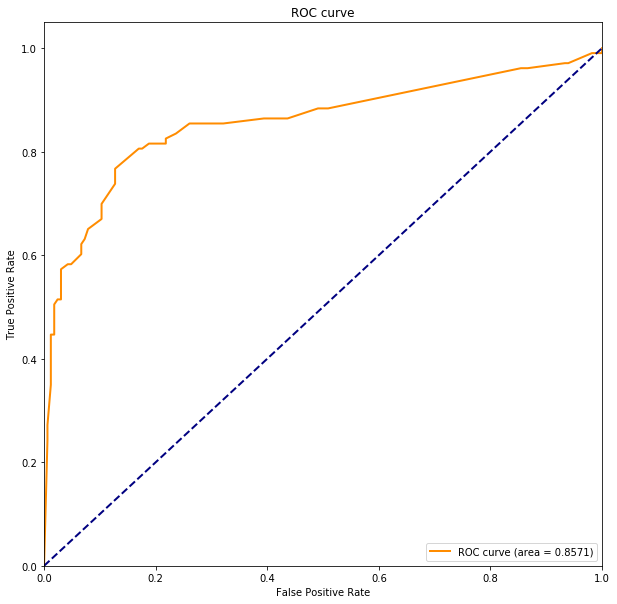

In [640]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=best_xgb_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

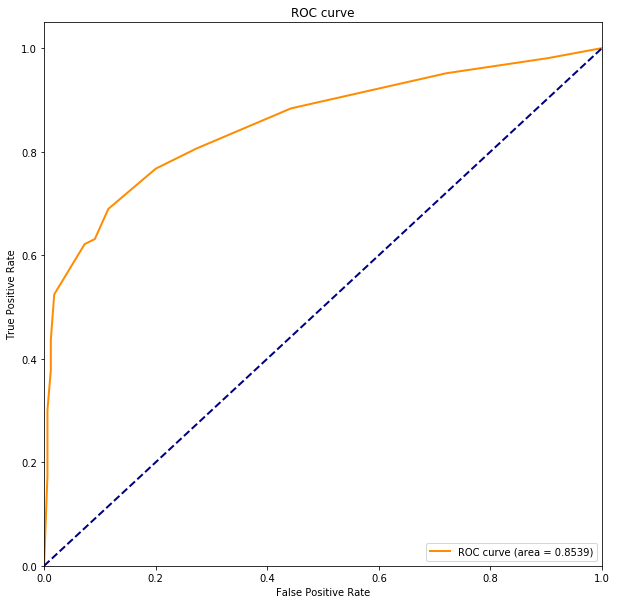

In [742]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=best_knn_model.predict_proba(X_test)[:,1]) 
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

# Feature importance

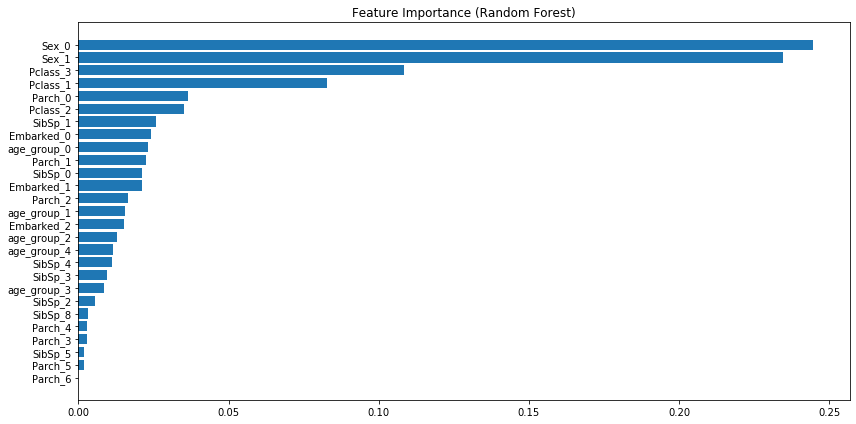

In [682]:
feature_importance = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(new_feature_names)[sorted_idx])
plt.title('Feature Importance (Random Forest)')

fig.tight_layout()
plt.show()

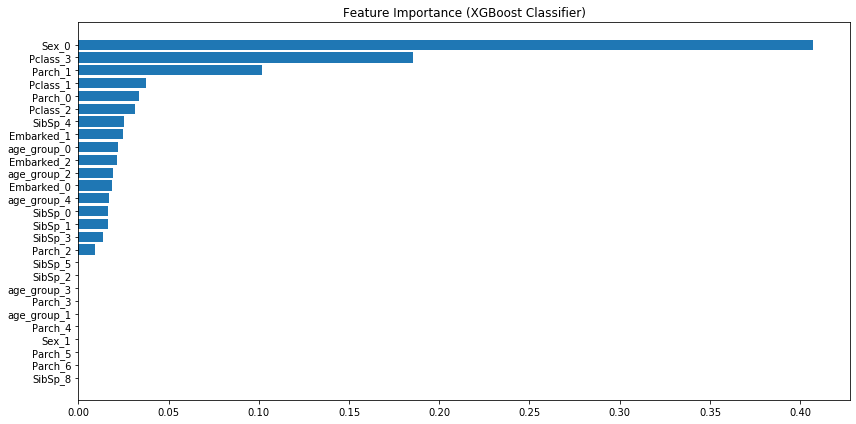

In [683]:
feature_importance = best_xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(new_feature_names)[sorted_idx])
plt.title('Feature Importance (XGBoost Classifier)')

fig.tight_layout()
plt.show()

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)
* Receiver operating characteristic curve _auc score and plot

In [684]:
# roc_auc score and plot
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def plot_auc_roc(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = {:0.4f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()

def get_Younden_idx(fpr, tpr, threshold):

    idx = np.argmax(np.abs(tpr-fpr))
    return threshold[idx]
    
def roc_auc_analysis(clf, dx, dy):
    
    preds = clf.predict_proba(dx)
    preds = list(map(lambda x: x[-1], preds))
    fpr, tpr, threshold = roc_curve(dy, preds)
    plot_auc_roc(fpr, tpr)
    print("first three predicted probabilities: ", preds[:3])
    print("roc_auc_score: ", roc_auc_score(dy, preds))
    J  = get_Younden_idx(fpr, tpr, threshold)
    print("Youden index: ", J)
    
    youden_preds = list(map(lambda x: 1 if x>=J else 0, preds))
    print("first three youden predicted results: ", youden_preds[:3])
    print("accuracy after apply youden index: ", accuracy_score(dy, youden_preds))
    
    if isinstance(clf, LogisticRegression):
        cof = clf.coef_.tolist()[0]
        cof_idx = list(zip(cof, range(len(cof))))
        top_5_fea = sorted(cof_idx, key=lambda x: abs(x[0]), reverse=True)[:5]
    elif isinstance(clf, RandomForestClassifier):
        fea_imp = clf.feature_importances_
        top_5_fea = sorted(list(zip(fea_imp, range(len(fea_imp)))), key=lambda x: abs(x[0]), reverse=True)[:5]
    else:
        pass
        top_5_fea = []
  
    print("top 5 features: ", list(map(lambda x: (new_feature_names[x[1]], round(x[0], 4)), top_5_fea)))
    

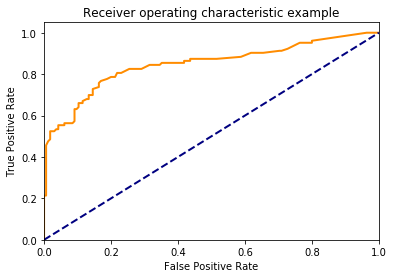

first three predicted probabilities:  [0.19086917102237977, 0.8604276676013951, 0.16321264689027246]
roc_auc_score:  0.8468078846719623
Youden index:  0.4935768991752035
first three youden predicted results:  [0, 1, 0]
accuracy after apply youden index:  0.8059701492537313
top 5 features:  [('Sex_0', 1.0108), ('Sex_1', -1.0108), ('Pclass_3', -0.7381), ('Pclass_1', 0.6142), ('age_group_0', 0.3797)]


In [685]:
roc_auc_analysis(best_lr_model, X_test, y_test)

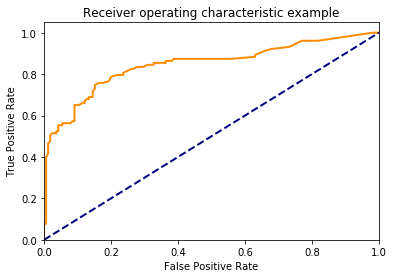

first three predicted probabilities:  [0.14279354357433072, 0.8614767769853673, 0.1376398959235039]
roc_auc_score:  0.846101794645484
Youden index:  0.35340843176436654
first three youden predicted results:  [0, 1, 0]
accuracy after apply youden index:  0.8097014925373134
top 5 features:  []


In [686]:
roc_auc_analysis(best_svm_model, X_test, y_test)

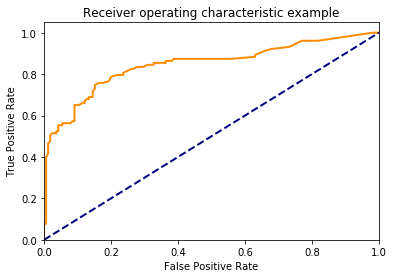

first three predicted probabilities:  [0.14279354357433072, 0.8614767769853673, 0.1376398959235039]
roc_auc_score:  0.846101794645484
Youden index:  0.35340843176436654
first three youden predicted results:  [0, 1, 0]
accuracy after apply youden index:  0.8097014925373134
top 5 features:  []


In [744]:
roc_auc_analysis(best_svm_model, X_test, y_test)

In [687]:
#roc_auc_analysis(best_svm_model, X_test, y_test) (kernel: linear)

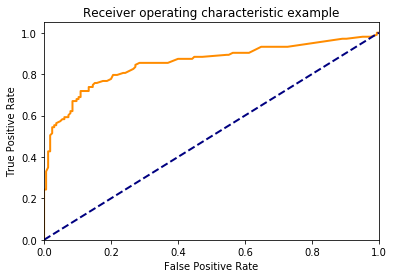

first three predicted probabilities:  [0.18397414801181192, 0.8744654473187424, 0.18472892550537076]
roc_auc_score:  0.8542806707855252
Youden index:  0.5045742915035129
first three youden predicted results:  [0, 1, 0]
accuracy after apply youden index:  0.8246268656716418
top 5 features:  [('Sex_0', 0.2446), ('Sex_1', 0.2346), ('Pclass_3', 0.1083), ('Pclass_1', 0.0829), ('Parch_0', 0.0364)]


In [688]:
roc_auc_analysis(best_rf_model, X_test, y_test) 

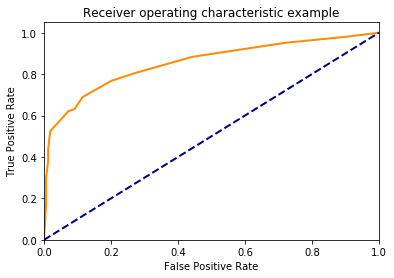

first three predicted probabilities:  [0.07692307692307693, 1.0, 0.0]
roc_auc_score:  0.853898205354516
Youden index:  0.46153846153846156
first three youden predicted results:  [0, 1, 0]
accuracy after apply youden index:  0.8097014925373134
top 5 features:  []


In [743]:
roc_auc_analysis(best_knn_model, X_test, y_test) 

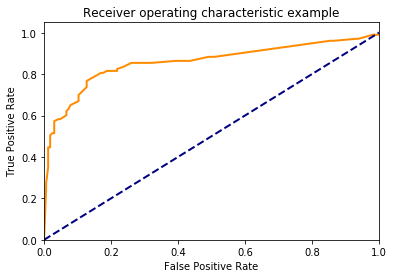

first three predicted probabilities:  [0.09275734, 0.86858356, 0.09275734]
roc_auc_score:  0.8571050308914386
Youden index:  0.33686116
first three youden predicted results:  [0, 1, 0]
accuracy after apply youden index:  0.832089552238806
top 5 features:  []


In [690]:
roc_auc_analysis(best_xgb_model, X_test, y_test) 

# Classification report
* Specificity and sensitivity
* accuracy

In [658]:
from sklearn.metrics import classification_report

target_names=['Victims','Survivors']
predictions = best_lr_model.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names)) 

print("Accuracy on Training set: {:.5f}".format(best_lr_model.score(X_train, y_train)))
print("Accuracy on Test set: {:.5f}".format(best_lr_model.score(X_test, y_test)))

              precision    recall  f1-score   support

     Victims       0.85      0.84      0.84       165
   Survivors       0.74      0.76      0.75       103

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy on Training set: 0.78331
Accuracy on Test set: 0.80597


In [669]:
from sklearn.metrics import confusion_matrix

predictions = best_lr_model.predict(X_test)

confmat=confusion_matrix(y_test, predictions)
confmat

array([[138,  27],
       [ 25,  78]], dtype=int64)

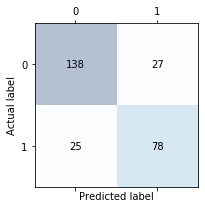

In [670]:
fig, ax = plt.subplots(figsize=(3.0, 3.0))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.tight_layout()
plt.show()

In [749]:
from sklearn.metrics import classification_report

target_names=['Victims','Survivors']
predictions = best_svm_model.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names)) 

print("Accuracy on Training set: {:.5f}".format(best_svm_model.score(X_train, y_train)))
print("Accuracy on Test set: {:.5f}".format(best_svm_model.score(X_test, y_test)))

              precision    recall  f1-score   support

     Victims       0.82      0.85      0.83       165
   Survivors       0.75      0.69      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

Accuracy on Training set: 0.78491
Accuracy on Test set: 0.79104


In [750]:
from sklearn.metrics import confusion_matrix

predictions = best_svm_model.predict(X_test)

conmat=confusion_matrix(y_test, predictions)
conmat

array([[141,  24],
       [ 32,  71]], dtype=int64)

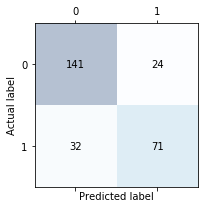

In [751]:
fig, ax = plt.subplots(figsize=(3.0, 3.0))
ax.matshow(conmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conmat.shape[0]):
    for j in range(conmat.shape[1]):
        ax.text(x=j, y=i, s=conmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.tight_layout()
plt.show()

In [661]:
from sklearn.metrics import classification_report

target_names=['Victims','Survivors']
predictions = best_rf_model.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names)) 

print("Accuracy on Training set: {:.5f}".format(best_rf_model.score(X_train, y_train)))
print("Accuracy on Test set: {:.5f}".format(best_rf_model.score(X_test, y_test)))

              precision    recall  f1-score   support

     Victims       0.83      0.88      0.86       165
   Survivors       0.80      0.72      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

Accuracy on Training set: 0.83949
Accuracy on Test set: 0.82090


In [675]:
from sklearn.metrics import confusion_matrix

predictions = best_rf_model.predict(X_test)

conf=confusion_matrix(y_test, predictions)
conf

array([[146,  19],
       [ 29,  74]], dtype=int64)

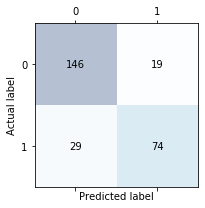

In [676]:
fig, ax = plt.subplots(figsize=(3.0, 3.0))
ax.matshow(conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        ax.text(x=j, y=i, s=conf[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.tight_layout()
plt.show()

In [662]:
from sklearn.metrics import classification_report

target_names=['Victims','Survivors']
predictions = best_knn_model.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names)) 

print("Accuracy on Training set: {:.5f}".format(best_knn_model.score(X_train, y_train)))
print("Accuracy on Test set: {:.5f}".format(best_knn_model.score(X_test, y_test)))

              precision    recall  f1-score   support

     Victims       0.80      0.91      0.85       165
   Survivors       0.81      0.63      0.71       103

    accuracy                           0.80       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268

Accuracy on Training set: 0.81059
Accuracy on Test set: 0.80224


In [677]:
from sklearn.metrics import confusion_matrix

predictions = best_knn_model.predict(X_test)

confm=confusion_matrix(y_test, predictions)
confm

array([[150,  15],
       [ 38,  65]], dtype=int64)

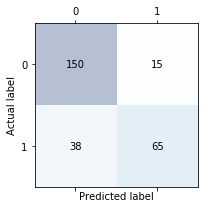

In [678]:
fig, ax = plt.subplots(figsize=(3.0, 3.0))
ax.matshow(confm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confm.shape[0]):
    for j in range(confm.shape[1]):
        ax.text(x=j, y=i, s=confm[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.tight_layout()
plt.show()

In [665]:
from sklearn.metrics import classification_report

target_names=['Victims','Survivors']
predictions = best_xgb_model.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names)) 

print("Accuracy on Training set: {:.5f}".format(best_xgb_model.score(X_train, y_train)))
print("Accuracy on Test set: {:.5f}".format(best_xgb_model.score(X_test, y_test)))

              precision    recall  f1-score   support

     Victims       0.79      0.93      0.86       165
   Survivors       0.85      0.60      0.70       103

    accuracy                           0.81       268
   macro avg       0.82      0.77      0.78       268
weighted avg       0.81      0.81      0.80       268

Accuracy on Training set: 0.82986
Accuracy on Test set: 0.80597


In [679]:
from sklearn.metrics import confusion_matrix

predictions = best_xgb_model.predict(X_test)

confmt=confusion_matrix(y_test, predictions)
confmt

array([[154,  11],
       [ 41,  62]], dtype=int64)

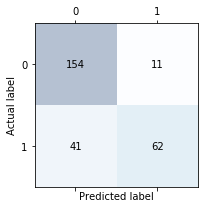

In [680]:
fig, ax = plt.subplots(figsize=(3.0, 3.0))
ax.matshow(confmt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmt.shape[0]):
    for j in range(confmt.shape[1]):
        ax.text(x=j, y=i, s=confmt[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.tight_layout()
plt.show()